In [9]:
import sys     # Standard library imports
import pandas as pd   # related third party imports
import numpy as np
from matplotlib import pyplot as plt
from sqlalchemy import create_engine

In [2]:
train = pd.read_csv("train.csv")
ideal = pd.read_csv("ideal.csv")
test = pd.read_csv("test.csv")

In [3]:
train

,x,y1,y2,y3,y4
0,-20.0,39.778572,-40.078590,-20.214268,-0.324914
1,-19.9,39.604813,-39.784000,-20.070950,-0.058820
2,-19.8,40.099070,-40.018845,-19.906782,-0.451830
3,-19.7,40.151100,-39.518402,-19.389118,-0.612044
4,-19.6,39.795662,-39.360065,-19.815890,-0.306076
...,...,...,...,...,...
395,19.5,-38.254158,39.661987,19.536741,0.695158
396,19.6,-39.106945,39.067880,19.840752,0.638423
397,19.7,-38.926495,40.211475,19.516634,0.109105
398,19.8,-39.276672,40.038870,19.377943,0.189025


In [5]:
ideal_lcol = len(ideal.columns)
print(ideal_lcol)
train_lrow = len(train)
print(train_lrow)
train_col = len(train.columns)
print(train_col)

51
400
5


In [4]:
ideal_lcol = len(ideal.columns)
train_lrow = train.index[-1] + 1
train_col = len(train.columns)

            # Loop and find perfect four functions
index_list = []  # here 4 ideal indexes will be strored
least_square = []  # here 4 ideal MSEs will be stores
for j in range(1, train_col):  # loop through 4 train functions
    least_square1 = []
    for k in range(1, ideal_lcol):  # loop through 50 ideal functions
        MSE = 0  # Sum MSE
        for i in range(train_lrow):  # calculate MSE Y value of train and Y value of ideal function
            z1 = train.iloc[i, j]  # Train y value
            z2 = ideal.iloc[i, k]  # Ideal y value
            MSE += ((z1 - z2) ** 2)
        least_square1.append(MSE / train_lrow)
    min_least = min(least_square1)
    index = least_square1.index(min_least)  # find index of the ideal function
    index_list.append(index + 1)
    least_square.append(min_least)

per_frame = pd.DataFrame(list(zip(index_list, least_square)), columns=["Index", "least_square_value"])

In [5]:
class function_finder:
    def __init__(self):
        pass

    def ideal_matches(self, train_df, ideal_df):
        """
        function finds matches between training functions and ideal functions based on min(MSE)
        :param train_df: define training functions
        :param ideal_df: define ideal functions set
        :return: ideal functions dataframe and their deviations
        """

        # find last parameters of both fucntions
        if isinstance(train_df, pd.DataFrame) and isinstance(ideal_df, pd.DataFrame):
            ideal_lcol = len(ideal_df.columns)
            train_lrow = train_df.index[-1] + 1
            train_col = len(train_df.columns)

            # Loop and find perfect four functions
            index_list = []  # here 4 ideal indexes will be strored
            least_square = []  # here 4 ideal MSEs will be stores
            for j in range(1, train_col):  # loop through 4 train functions
                least_square1 = []
                for k in range(1, ideal_lcol):  # loop through 50 ideal functions
                    MSE = 0  # Sum MSE
                    for i in range(train_lrow):  # calculate MSE Y value of train and Y value of ideal function
                        z1 = train_df.iloc[i, j]  # Train y value
                        z2 = ideal_df.iloc[i, k]  # Ideal y value
                        MSE += ((z1 - z2) ** 2)
                    least_square1.append(MSE / train_lrow)
                min_least = min(least_square1)
                index = least_square1.index(min_least)  # find index of the ideal function
                index_list.append(index + 1)
                least_square.append(min_least)

            per_frame = pd.DataFrame(list(zip(index_list, least_square)), columns=["Index", "least_square_value"])

            return per_frame
        else:
            raise TypeError("Argument not of Pandas DataFrame type")

    def ideal_via_row(self, test_df):
        """
        determine for each and every x-y-pair of values whether they can be assigned to the four chosen ideal functions
        :param test_df: Dataframe with x and y values
        :return: test function paired with values from the four ideal functions
        """
        if isinstance(test_df, pd.DataFrame):
            test_lrow = test_df.index[-1] + 1  # last row of the test df (used for loop)
            test_lcol = len(test_df.columns)  # last columns of the test df (used for loop)
            # print(test)

            ideal_index = []  # list to store index of ideal function
            deviation = []  # list to store Deviation
            for j in range(test_lrow):  # loop through rows
                MSE_l = []  # list to store all four deviations
                for i in range(2, test_lcol):  # loop through colums 2, 3, 4, 5
                    z1 = test_df.iloc[j, 1]
                    z2 = test_df.iloc[j, i]
                    MSE = ((z2 - z1) ** 2)  # calculate MSE
                    MSE_l.append(MSE)  # append MSE to the MSE_l list
                min_least = min(MSE_l)  # select min deviation in MSE_l
                if min_least < (np.sqrt(2)):
                    deviation.append(min_least)  # append min_least to the deviation list
                    index = MSE_l.index(min_least)  # select index of the min_least to find ideal function
                    ideal_index.append(index)  # append index to the ideal_index list
                else:
                    deviation.append(min_least)
                    ideal_index.append("Miss")  # no criteria match

            # Add two new columns to the test
            test["Deviation"] = deviation
            test["Ideal index"] = ideal_index

            return test

        else:
            raise TypeError("Argument not of Pandas DataFrame type")

    def prepare_graphs(self, x_fun, x_par, y1_fun, y1_par, y2_fun, y2_par, show_plots=True):
        """
        function prepares a plot based on given paramaters
        :param x_fun: x function
        :param x_par: x position
        :param y1_fun: y1 function
        :param y1_par: y1 position
        :param y2_fun: y2 function
        :param y2_par: y2 position
        :param show_plots: True/False to display plot
        :return: graph of x and y
        """

        x = x_fun.iloc[:, x_par]    # x
        y1 = y1_fun.iloc[:, y1_par]     # y1 (training function)
        y2 = y2_fun.iloc[:, y2_par]     # y2 (ideal function)

        # print(y1, y2)

        plt.plot(x, y1, c="r", label="Train function")  # plot both axis
        plt.plot(x, y2, c="b", label="Ideal function")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend(loc=3)

        if show_plots is True:
            plt.show()  # show current plot
            plt.clf()   # clear plots
        elif show_plots is False:
            pass
        else:
            pass  # no paramater show_plots or wrong paramater show_plots was given

In [6]:
class SqliteDb(function_finder):
    """
    Load data into Sqlite database
    """

    def db_and_table_creation(self, dataframe, db_name, table_name):
        """
        function creates a database from a dataframe input
        :param dataframe: dataframe
        :param db_name: database name
        :param table_name: table name
        :return: database file into the same folder as the project
        """
        try:
            engine = create_engine(f"sqlite:///{db_name}.db", echo=True)  # insert name of the DB
            sqlite_connection = engine.connect()  # connect to the DB
            for i in range(len(dataframes)):  # loop through list of dataframes
                dataframez = dataframe[i]
                dataframez.to_sql(table_name[i], sqlite_connection, if_exists="fail")  # load dataframe to DB
            sqlite_connection.close()   # close connection
        except Exception:
            exception_type, exception_value, exception_traceback = sys.exc_info()  # get exception info
            print(exception_type, exception_value, exception_traceback)     #return exception info to the user

   Index  least_square_value
0     42            0.085616
1     41            0.089005
2     11            0.074655
3     48            0.079909


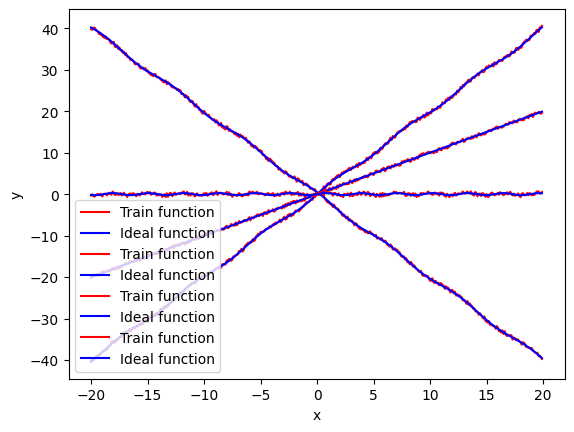

In [11]:
train = pd.read_csv("train.csv")
ideal = pd.read_csv("ideal.csv")
test = pd.read_csv("test.csv")
# Check data formats
#print(train.head)
#print(ideal.head)
#print(test.head)

# get ideal functions based on train data
df = function_finder().ideal_matches(train, ideal)
print(df)

# plot graph of all 4 pair functions together
graph = function_finder()
for i in range(1, len(train.columns)):
    graph.prepare_graphs(train, 0, train, i, ideal, df.iloc[i-1, 0], False)

In [12]:
per_frame

,Index,least_square_value
0,42,0.085616
1,41,0.089005
2,11,0.074655
3,48,0.079909


In [13]:
test = test.sort_values(by=["x"], ascending=True)   # sort by x
test = test.reset_index()   # reset index
test = test.drop(columns=["index"])     # drop old index column

In [14]:
ideals = []
for i in range(0, 4):
    ideals.append(ideal[["x", f"y{str(df.iloc[i, 0])}"]])

# merge test and 4 ideal functions
for i in ideals:
    test = test.merge(i, on="x", how="left")

# determine for each and every x-y-pair of values whether or not they can be assigned to the four chosen ideal functions
test = function_finder().ideal_via_row(test)

# Replace values with ideal function names
for i in range(0, 4):
    test["Ideal index"] = test["Ideal index"].replace([i], str(f"y{df.iloc[i, 0]}"))

In [15]:
test

,x,y,y42,y41,y11,y48,Deviation,Ideal index
0,-20.0,-19.284970,40.204040,-40.456474,-20.0,-0.186278,0.511268,y11
1,-19.8,-19.915014,39.890660,-40.006836,-19.8,-0.236503,0.013228,y11
2,-19.3,-38.458572,39.050125,-38.817684,-19.3,-0.195970,0.128961,y41
3,-19.2,-37.170870,38.869610,-38.571660,-19.2,-0.161224,1.962213,Miss
4,-19.1,-38.155376,38.684402,-38.323917,-19.1,-0.120051,0.028406,y41
...,...,...,...,...,...,...,...,...
95,18.2,18.535152,-36.001823,36.097584,18.2,-0.240830,0.112327,y11
96,18.7,0.832272,-36.905582,37.325500,18.7,-0.073668,0.820727,y48
97,18.8,37.523400,-37.100613,37.575233,18.8,-0.024737,0.002687,y41
98,18.9,19.193245,-37.300636,37.825210,18.9,0.025179,0.085993,y11


In [16]:
test_scat = test
test_scat["ideal y value"] = ""
for i in range(0, 100):
    k = test_scat.iloc[i, 7]
    if k == "y42":
        test_scat.iloc[i, 8] = test_scat.iloc[i, 2]
    elif k == "y41":
        test_scat.iloc[i, 8] = test_scat.iloc[i, 3]
    elif k == "y11":
        test_scat.iloc[i, 8] = test_scat.iloc[i, 4]
    elif k == "y48":
        test_scat.iloc[i, 8] = test_scat.iloc[i, 5]
    elif k == "Miss":
        test_scat.iloc[i, 8] = test_scat.iloc[i, 1]
print(test_scat)

# Drop other columns that are not used
test = test.drop(columns=["y42", "y41", "y11", "y48", "ideal y value"])
print(test)

       x          y        y42        y41   y11       y48  Deviation  \
0  -20.0 -19.284970  40.204040 -40.456474 -20.0 -0.186278   0.511268   
1  -19.8 -19.915014  39.890660 -40.006836 -19.8 -0.236503   0.013228   
2  -19.3 -38.458572  39.050125 -38.817684 -19.3 -0.195970   0.128961   
3  -19.2 -37.170870  38.869610 -38.571660 -19.2 -0.161224   1.962213   
4  -19.1 -38.155376  38.684402 -38.323917 -19.1 -0.120051   0.028406   
..   ...        ...        ...        ...   ...       ...        ...   
95  18.2  18.535152 -36.001823  36.097584  18.2 -0.240830   0.112327   
96  18.7   0.832272 -36.905582  37.325500  18.7 -0.073668   0.820727   
97  18.8  37.523400 -37.100613  37.575233  18.8 -0.024737   0.002687   
98  18.9  19.193245 -37.300636  37.825210  18.9  0.025179   0.085993   
99  19.7  38.955273 -39.070175  39.775787  19.7  0.247887   0.673243   

   Ideal index ideal y value  
0          y11         -20.0  
1          y11         -19.8  
2          y41    -38.817684  
3         M

In [17]:
test

,x,y,Deviation,Ideal index
0,-20.0,-19.284970,0.511268,y11
1,-19.8,-19.915014,0.013228,y11
2,-19.3,-38.458572,0.128961,y41
3,-19.2,-37.170870,1.962213,Miss
4,-19.1,-38.155376,0.028406,y41
...,...,...,...,...
95,18.2,18.535152,0.112327,y11
96,18.7,0.832272,0.820727,y48
97,18.8,37.523400,0.002687,y41
98,18.9,19.193245,0.085993,y11


In [18]:
train = train.rename(columns={"y11": "Y11 (training func)", "y41": "Y41 (training func)",
                              "y42": "Y42 (training func)", "y48": "Y48 (training func)"})

# rename columns for the ideal table
for col in ideal.columns:       # rename columns in ideal to fit criteria
    if len(col) > 1:    # if column name is not x, therefore > 1
        ideal = ideal.rename(columns={col: f"{col} (ideal func)"})

In [19]:
test = test.rename(columns={"x": "X (test func)",
                            "y": "Y (test func)",
                            "Deviation": "Delta Y (test func)",
                            "Ideal index": "No. of ideal func"})
print(test)

    X (test func)  Y (test func)  Delta Y (test func) No. of ideal func
0           -20.0     -19.284970             0.511268               y11
1           -19.8     -19.915014             0.013228               y11
2           -19.3     -38.458572             0.128961               y41
3           -19.2     -37.170870             1.962213              Miss
4           -19.1     -38.155376             0.028406               y41
..            ...            ...                  ...               ...
95           18.2      18.535152             0.112327               y11
96           18.7       0.832272             0.820727               y48
97           18.8      37.523400             0.002687               y41
98           18.9      19.193245             0.085993               y11
99           19.7      38.955273             0.673243               y41

[100 rows x 4 columns]


In [20]:
dbs = SqliteDb()
dataframes = [train, ideal, test]
table_names = ["train_table", "ideal_table", "test_table"]
dbs.db_and_table_creation(dataframes, "assignment_database", table_names)

2023-04-25 06:41:01,111 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-04-25 06:41:01,113 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("train_table")
2023-04-25 06:41:01,114 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-04-25 06:41:01,118 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("train_table")
2023-04-25 06:41:01,119 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-04-25 06:41:01,122 INFO sqlalchemy.engine.Engine 
CREATE TABLE train_table (
	"index" BIGINT, 
	x FLOAT, 
	y1 FLOAT, 
	y2 FLOAT, 
	y3 FLOAT, 
	y4 FLOAT
)


2023-04-25 06:41:01,123 INFO sqlalchemy.engine.Engine [no key 0.00113s] ()
2023-04-25 06:41:01,130 INFO sqlalchemy.engine.Engine CREATE INDEX ix_train_table_index ON train_table ("index")
2023-04-25 06:41:01,131 INFO sqlalchemy.engine.Engine [no key 0.00115s] ()
2023-04-25 06:41:01,145 INFO sqlalchemy.engine.Engine INSERT INTO train_table ("index", x, y1, y2, y3, y4) VALUES (?, ?, ?, ?, ?, ?)
2023-04-25 06:41:01,146 INFO sqlalchemy.engine.Engine 

2023-04-25 06:41:01,190 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("test_table")
2023-04-25 06:41:01,191 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-04-25 06:41:01,192 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("test_table")
2023-04-25 06:41:01,192 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-04-25 06:41:01,194 INFO sqlalchemy.engine.Engine 
CREATE TABLE test_table (
	"index" BIGINT, 
	"X (test func)" FLOAT, 
	"Y (test func)" FLOAT, 
	"Delta Y (test func)" FLOAT, 
	"No. of ideal func" TEXT
)


2023-04-25 06:41:01,194 INFO sqlalchemy.engine.Engine [no key 0.00053s] ()
2023-04-25 06:41:01,195 INFO sqlalchemy.engine.Engine CREATE INDEX ix_test_table_index ON test_table ("index")
2023-04-25 06:41:01,196 INFO sqlalchemy.engine.Engine [no key 0.00053s] ()
2023-04-25 06:41:01,199 INFO sqlalchemy.engine.Engine INSERT INTO test_table ("index", "X (test func)", "Y (test func)", "Delta Y (test func)", "No. of ideal func") VALUES (?, ?, ?, ?, ?)
2023-04-25 06:41:01,201 I

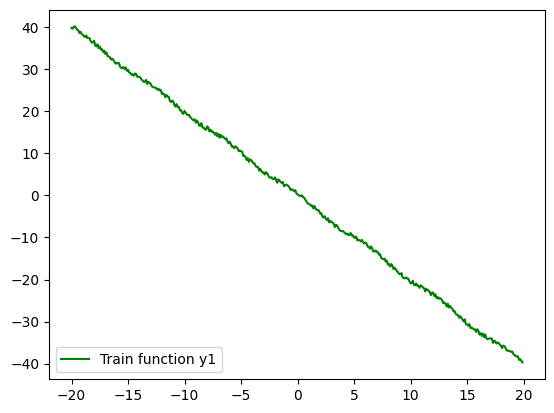

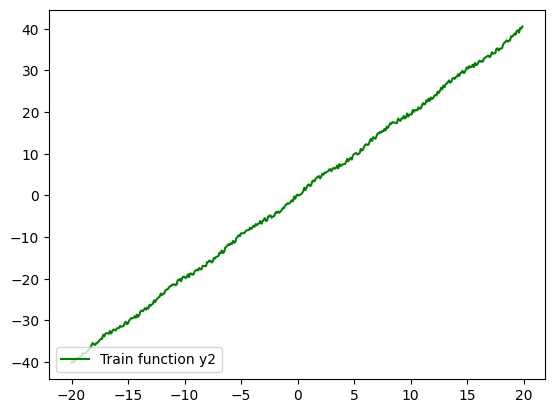

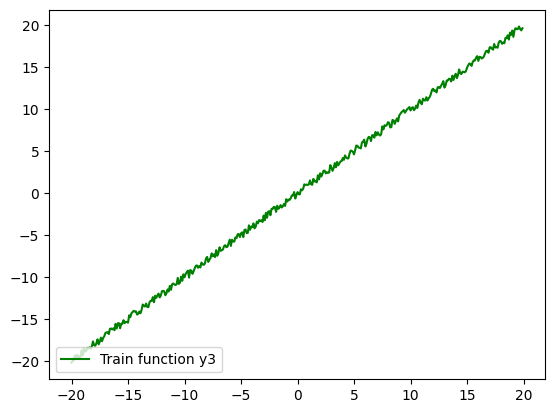

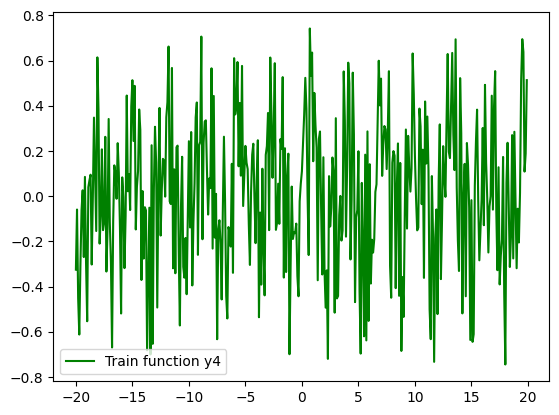

<Figure size 640x480 with 0 Axes>

In [21]:
plt.clf()
x = train.iloc[:, 0]
for i in range(1, len(train.columns)):
    plt.plot(x, train.iloc[:, i], c="g", label=f"Train function y{i}")
    plt.legend(loc=3)
    plt.show()
    plt.clf()

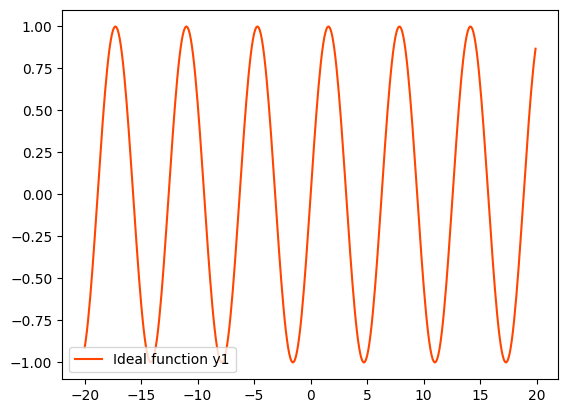

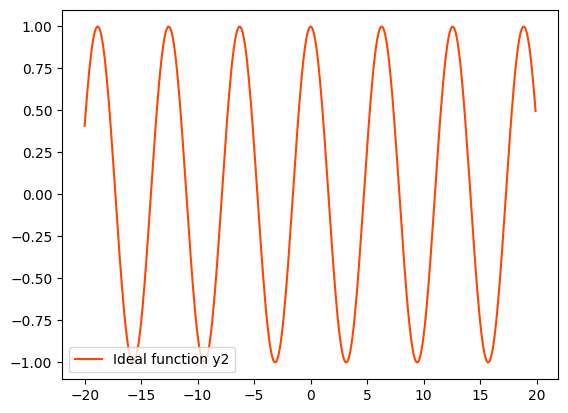

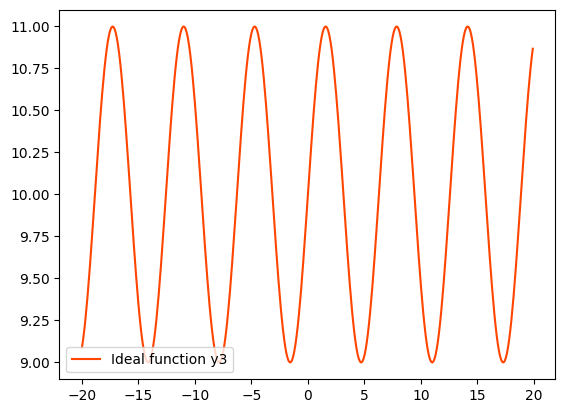

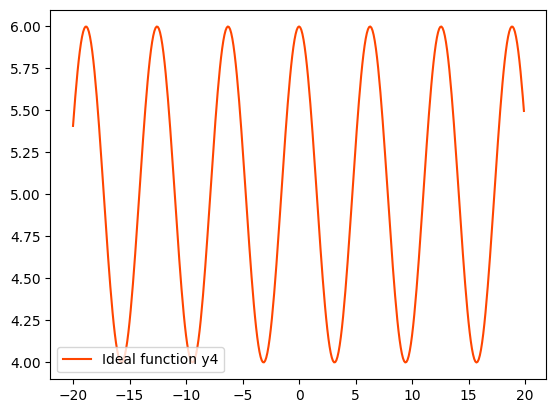

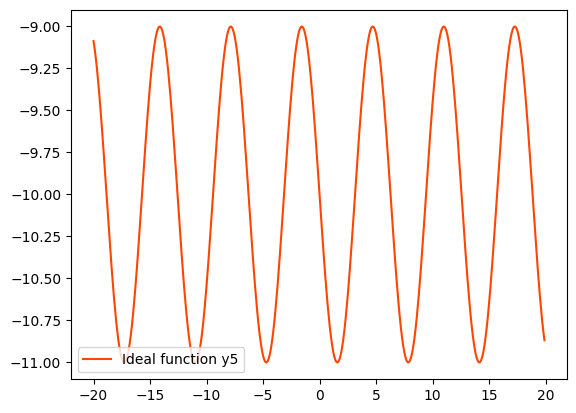

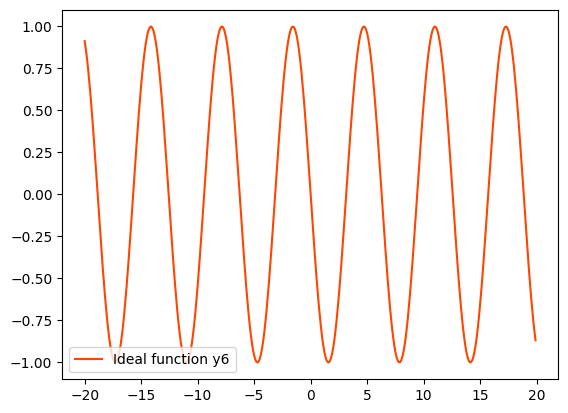

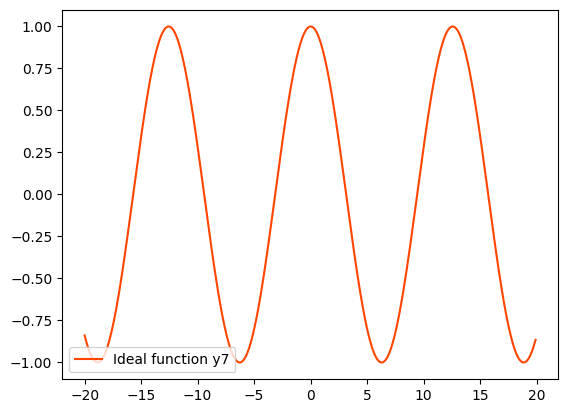

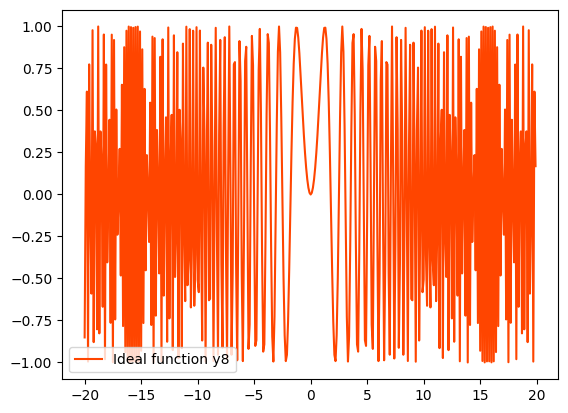

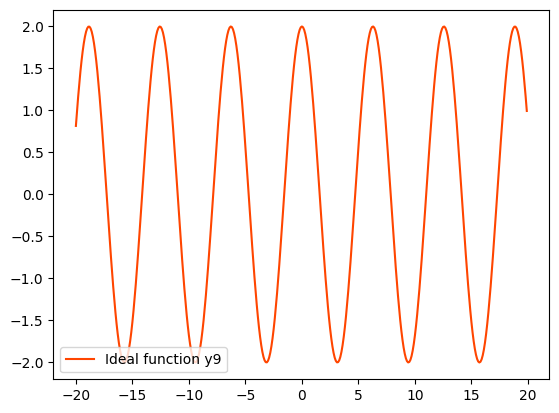

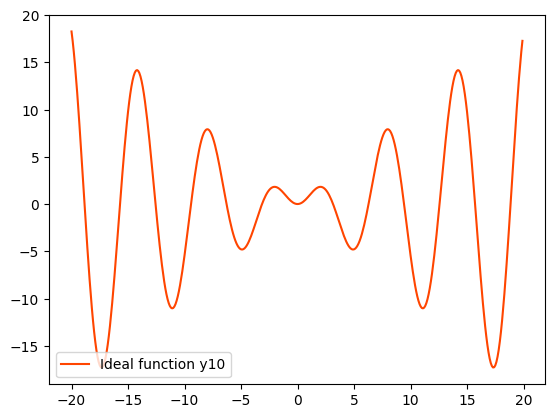

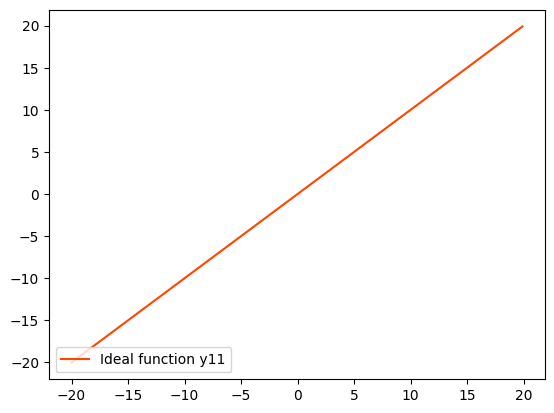

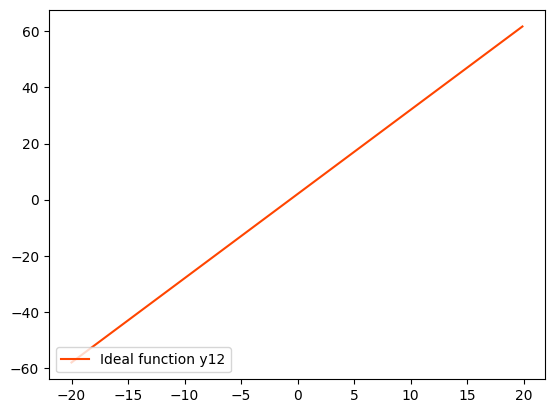

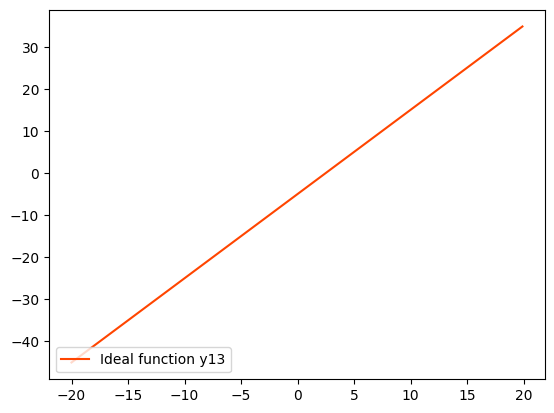

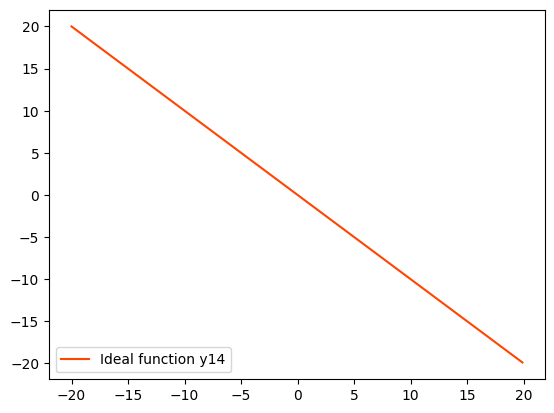

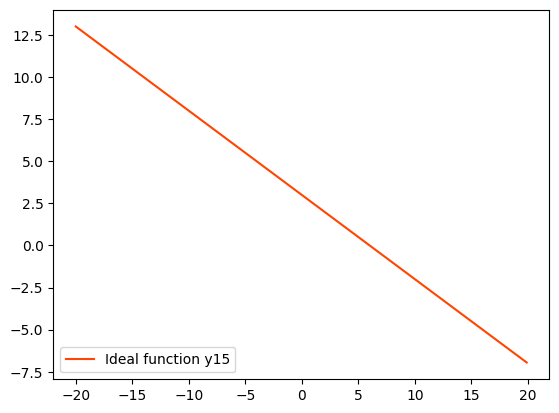

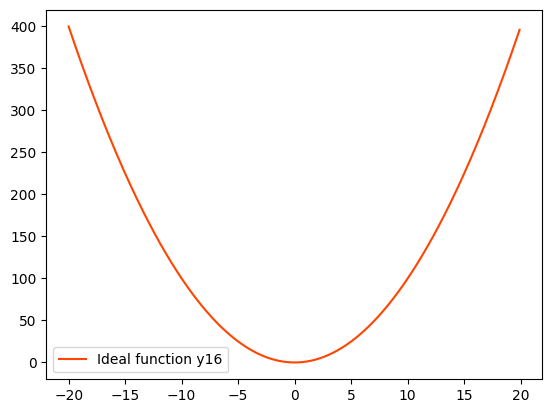

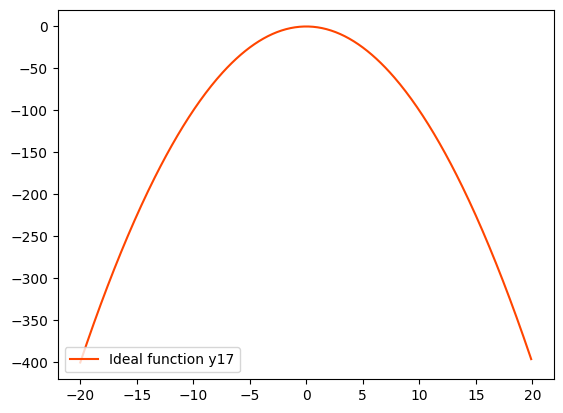

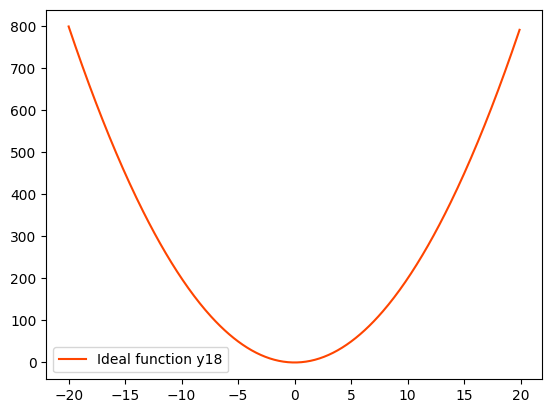

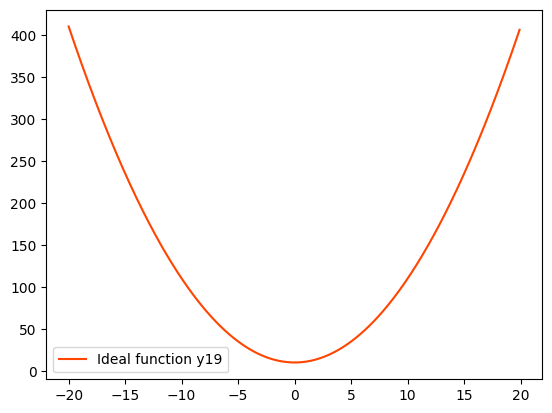

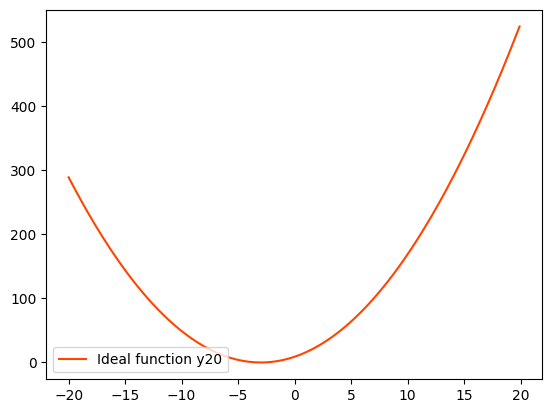

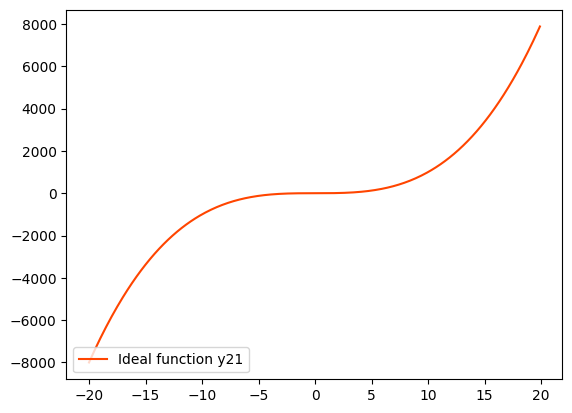

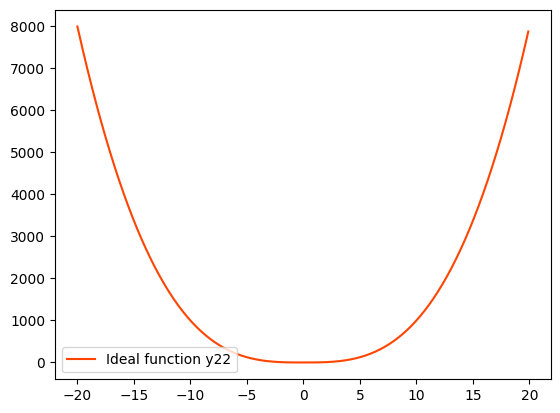

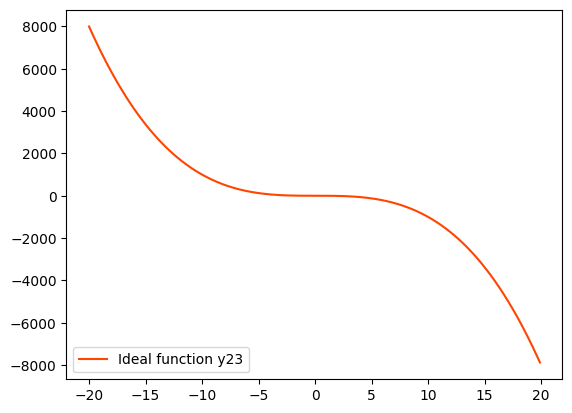

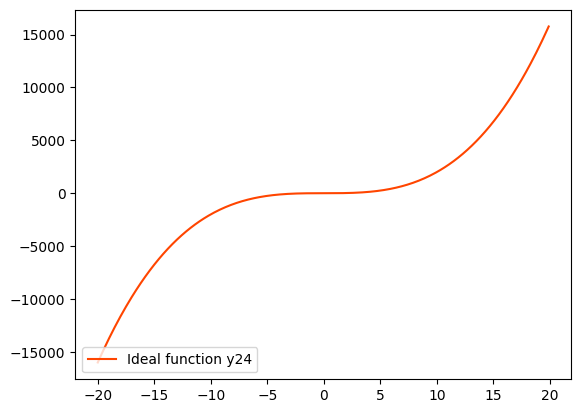

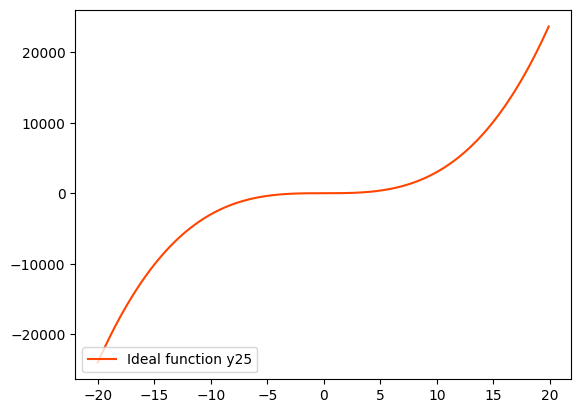

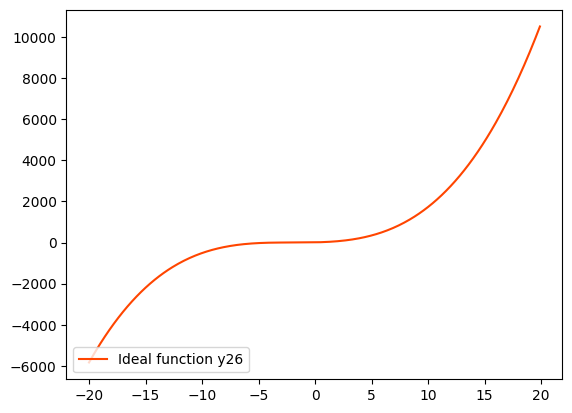

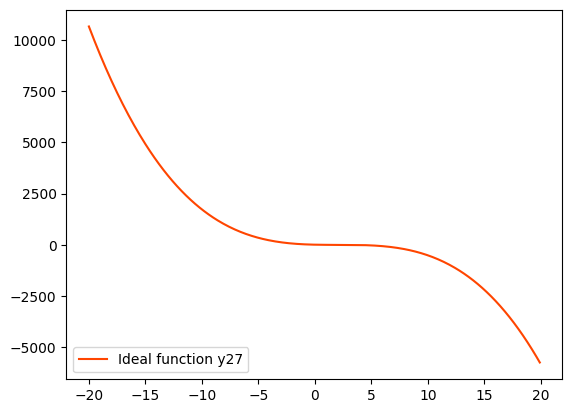

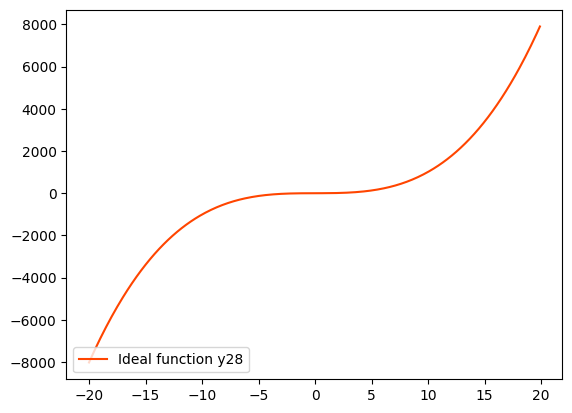

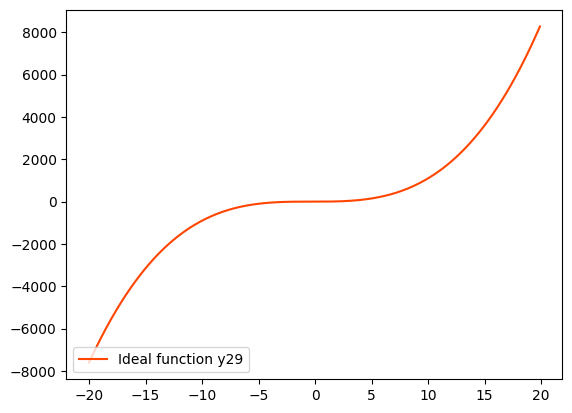

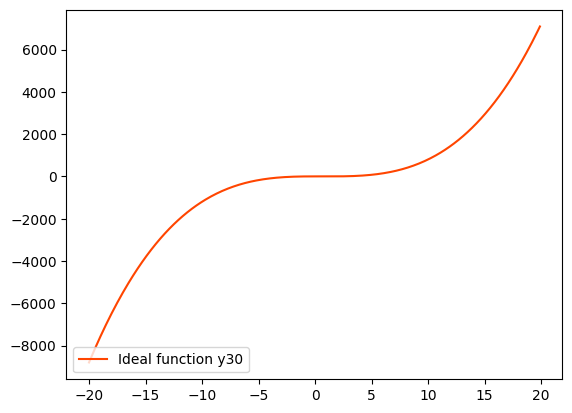

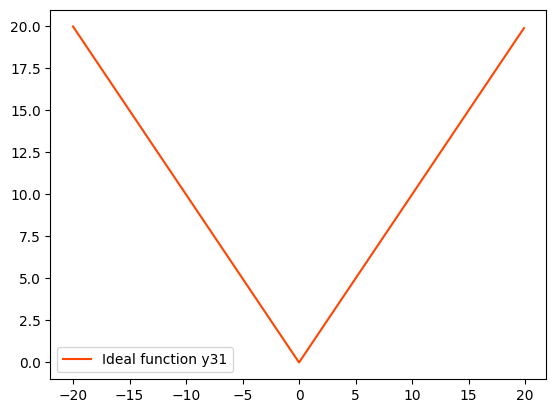

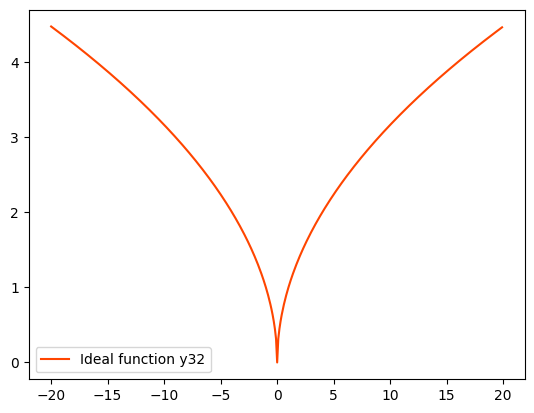

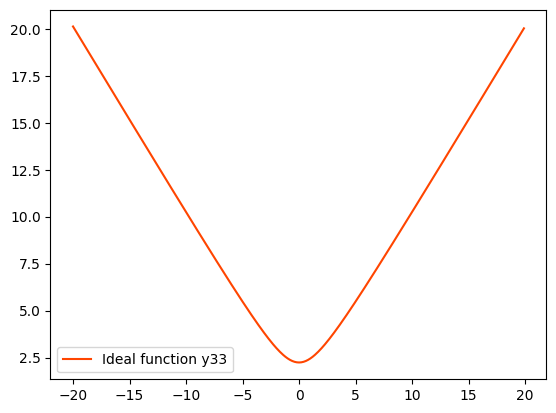

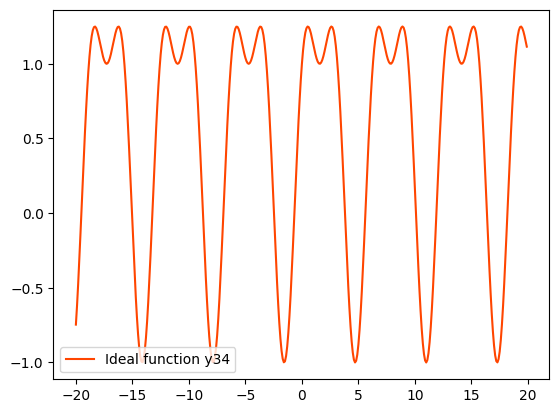

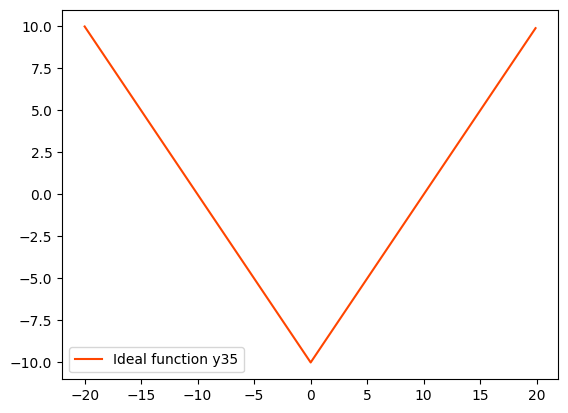

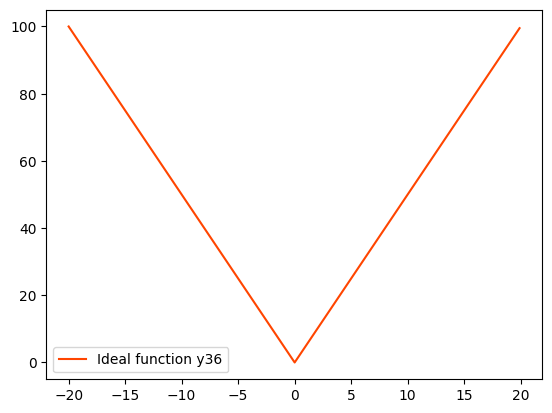

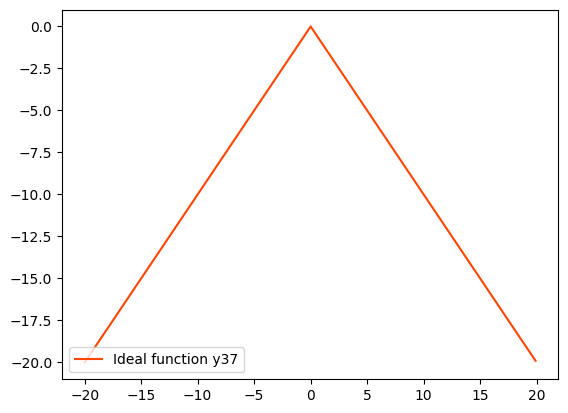

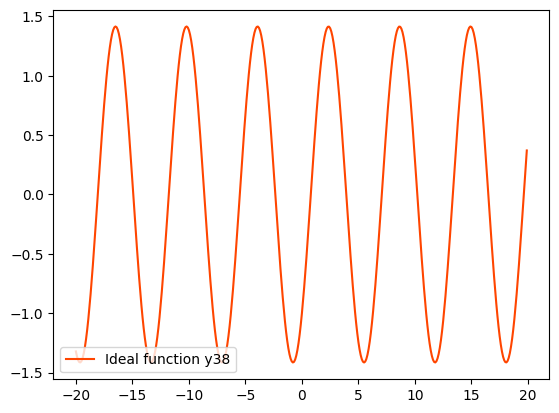

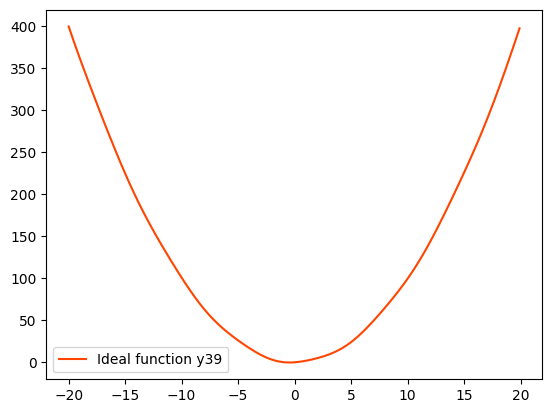

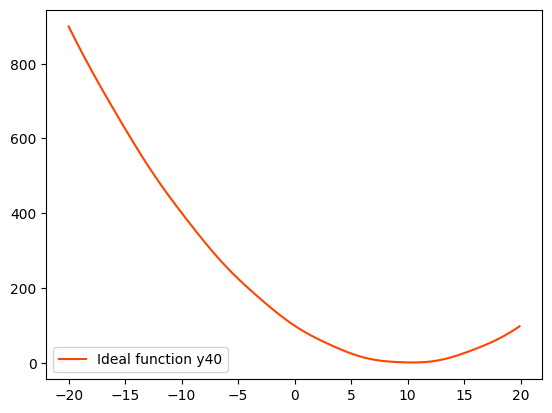

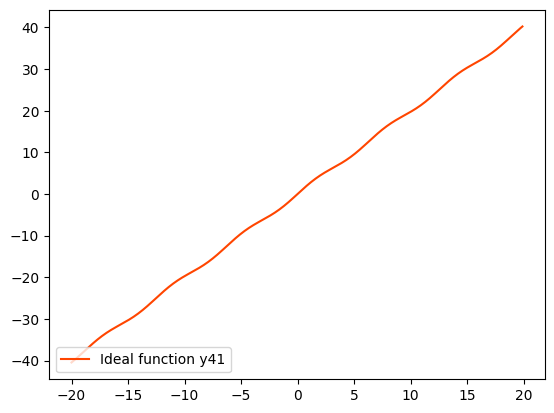

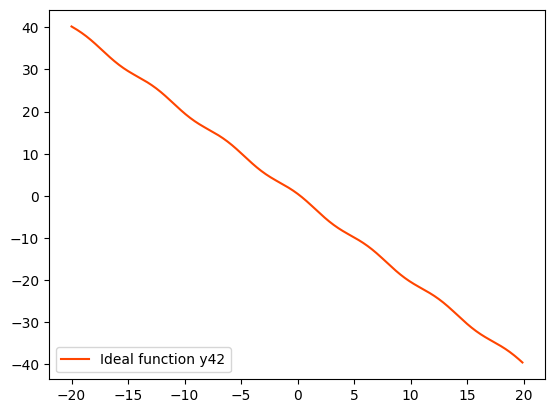

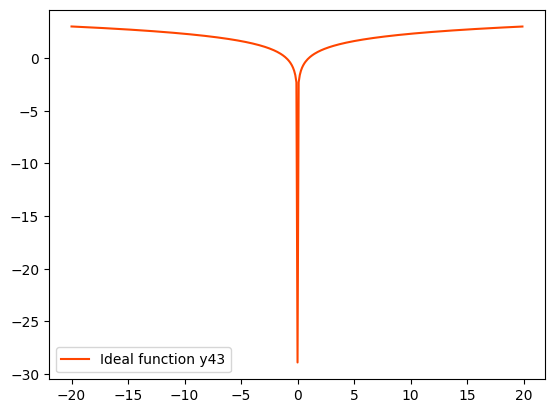

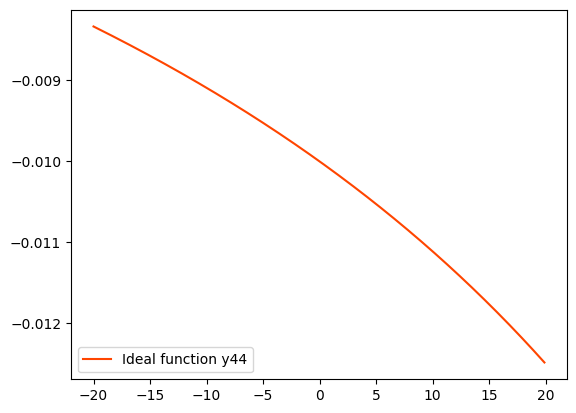

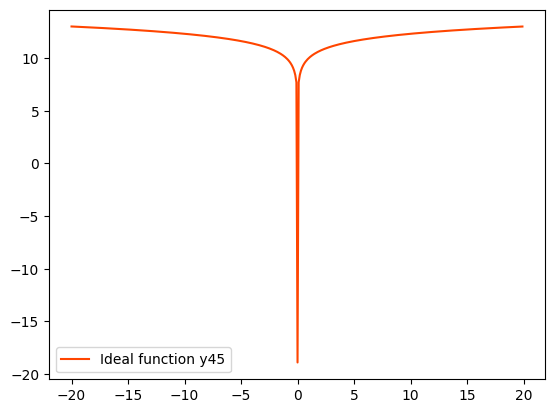

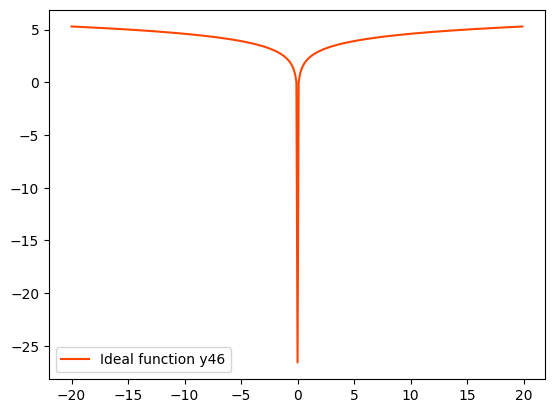

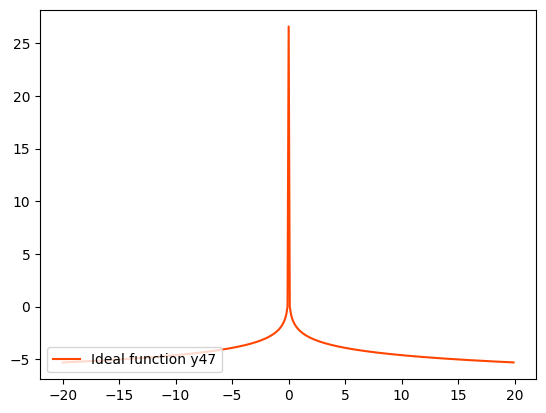

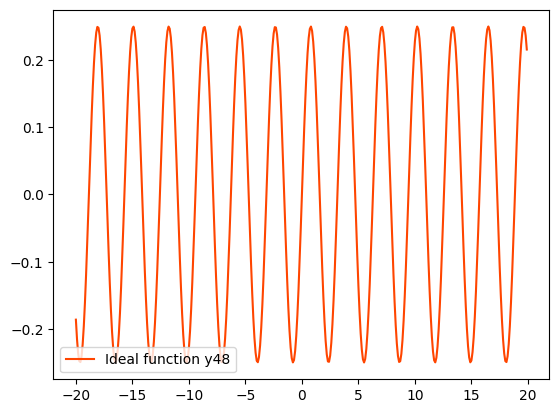

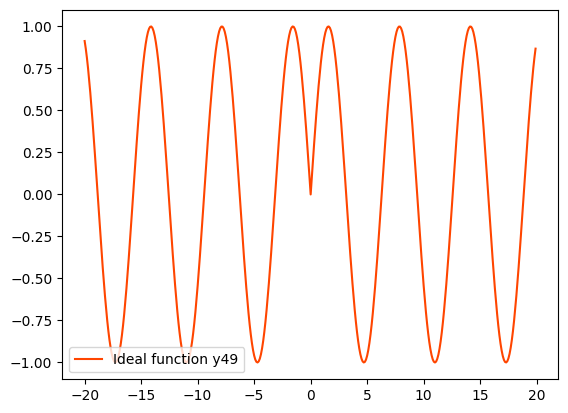

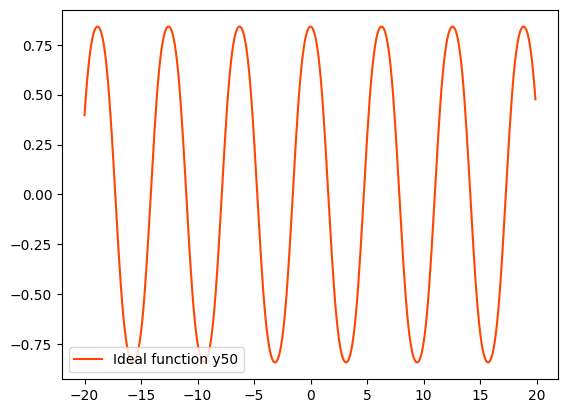

<Figure size 640x480 with 0 Axes>

In [22]:
plt.clf()
x = ideal.iloc[:, 0]
for i in range(1, len(ideal.columns)):
    plt.plot(x, ideal.iloc[:, i], c="#FF4500", label=f"Ideal function y{i}")
    plt.legend(loc=3)
    plt.show()
    plt.clf()

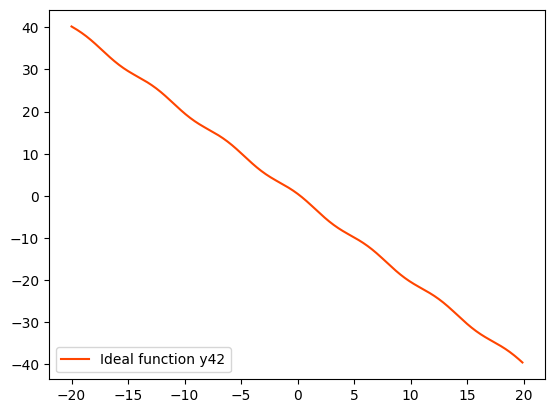

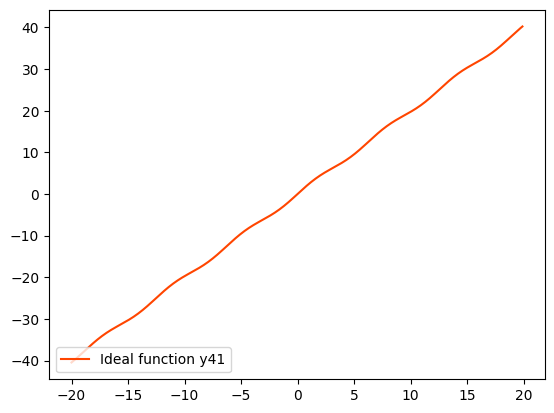

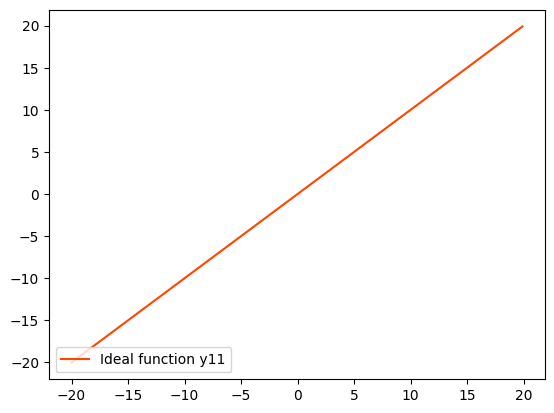

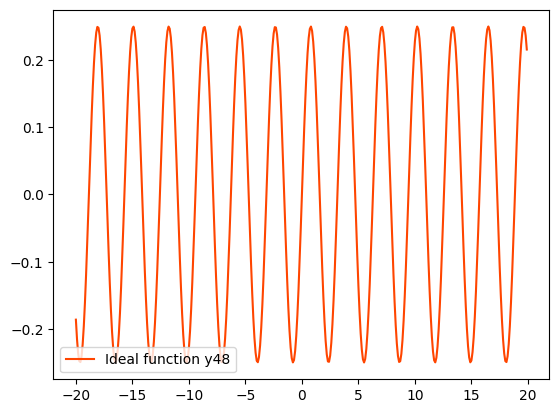

<Figure size 640x480 with 0 Axes>

In [23]:
plt.clf()
x = train.iloc[:, 0]
for i in range(0, df.index[-1] + 1):
    y = df.iloc[i, 0]  # get ideal y column number (11, 41, 42, 48)
    plt.plot(x, ideal.iloc[:, y], c="#FF4500", label=f"Ideal function y{y}")
    plt.legend(loc=3)
    plt.show()
    plt.clf()

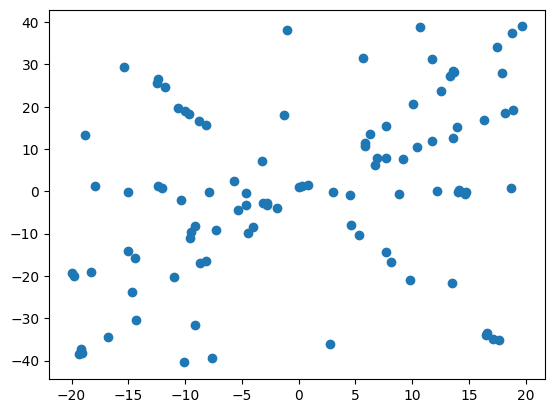

In [24]:
# test scatter (show points of test.csv)
plt.clf()  # clear previous plots
plt.scatter(test.iloc[:, 0], test.iloc[:, 1])  # select x and y values
plt.show()

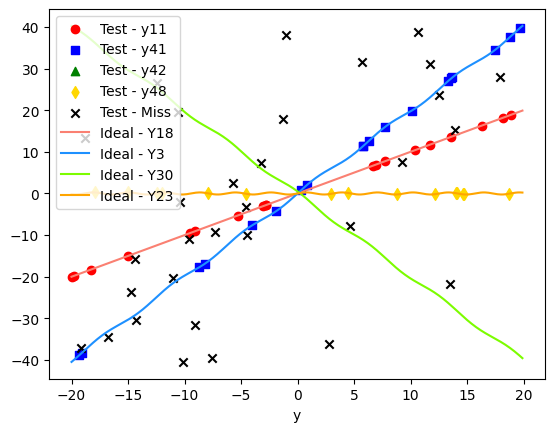

In [25]:
plt.clf()  # clear previous plots
# create lists to visualize test_scat dataframe
x1 = []
x2 = []
x3 = []
x4 = []
xm = []
y1 = []
y2 = []
y3 = []
y4 = []
ym = []

# append x and y values to the upper lists
for i in range(0, 100):
    k = test_scat.iloc[i, 7]
    if k == "y11":
        x1.append(test_scat.iloc[i, 0])  # append x value of y11 to the x1 list
        y1.append(test_scat.iloc[i, 8])  # append y value of y11 to the y1 list
    elif k == "y41":
        x2.append(test_scat.iloc[i, 0])  # append x value of y41 to the x2 list
        y2.append(test_scat.iloc[i, 8])  # append y value of 41 to the y2 list
    elif k == "y32":
        x3.append(test_scat.iloc[i, 0])  # append x value of y42 to the x3 list
        y3.append(test_scat.iloc[i, 8])  # append y value of y42 to the y3 list
    elif k == "y48":
        x4.append(test_scat.iloc[i, 0])  # append x value of y48 to the x4 list
        y4.append(test_scat.iloc[i, 8])  # append y value of y48 to the y4 list
    elif k == "Miss":
        xm.append(test_scat.iloc[i, 0])  # append x value of "Miss" values to the xm list
        ym.append(test_scat.iloc[i, 8])  # append y value of "Miss" values to the ym list

# plot ideal functions and test y-values on the same scatter plot
plt.scatter(x1, y1, marker="o", label="Test - y11", color="r")
plt.scatter(x2, y2, marker="s", label="Test - y41", color="b")
plt.scatter(x3, y3, marker="^", label="Test - y42", color="g")
plt.scatter(x4, y4, marker="d", label="Test - y48", color="#FFD700")
plt.scatter(xm, ym, marker="x", label="Test - Miss", color="#000000")
plt.plot(ideal.iloc[:, 0], ideal.iloc[:, 11], label="Ideal - Y18", color="#FA8072")
plt.plot(ideal.iloc[:, 0], ideal.iloc[:, 41], label="Ideal - Y3", color="#1E90FF")
plt.plot(ideal.iloc[:, 0], ideal.iloc[:, 42], label="Ideal - Y30", color="#7CFC00")
plt.plot(ideal.iloc[:, 0], ideal.iloc[:, 48], label="Ideal - Y23", color="#FFA500")
plt.xlabel("x")
plt.xlabel("y")
plt.legend()
plt.show()